### This notebook has code to implement various machine learning approaches for Epic Methylation data on GRRN genes. It has 4 datasets, cross-sectional and longitudinal full and important features

#### 1. Load libraries

In [1]:
# Settings imported from other notebook Settings.ipynb
%run Settings.ipynb

In [2]:
pd.set_option('display.float_format', lambda x: '%.8f' % x)

#### 2. Load the data, data and the labels (outcome variable) 

In [3]:
dfs_final = joblib.load("E:/Machine Learning/Output Data/Epic Final set of features (n=150).pkl")
labels = joblib.load("E:/Machine Learning/Output Data/Response Variable (PTSS Epic).pkl")

In [4]:
print("Shape of different datasets :")
[dfs_final[i].shape for i in range(len(dfs_final))]


Shape of different datasets :


[(210, 2728), (148, 5356), (210, 150), (148, 150)]

In [5]:
# We will remove the PTSS first w3 and then others as per reviewer comments
# "w3_life_sumptsdworst_PTS", w2c1_life_sumptsdworst_PTS_symptom_severity
cols = ["w3_life_sumptsdworst_PTS"]
dfs_final = [x.loc[:, ~x.columns.str.contains('|'.join(cols))] for x in dfs_final]

In [6]:
dfs_final[1]

,cg11188799_1,cg19586199_1,cg03354771_1,cg16246200_1,cg12700033_1,cg15500320_1,cg13374701_1,cg11090676_1,cg00935119_1,cg26116980_1,cg01529076_1,cg01362515_1,cg01320969_1,cg27005894_1,cg22402853_1,cg15096815_1,cg16101035_1,cg18071894_1,cg06846259_1,cg10105971_1,cg03384545_1,cg05859578_1,cg05898629_1,cg25053252_1,cg22322863_1,cg00039463_1,cg06633814_1,cg12271199_1,cg15900987_1,cg06959103_1,cg11872076_1,cg25034766_1,cg24718866_1,cg23014605_1,cg05970790_1,cg15001636_1,cg06432200_1,cg16606005_1,cg12100463_1,cg10913456_1,cg11065262_1,cg15684811_1,cg09781971_1,cg02072813_1,cg14274357_1,cg21209684_1,cg18014042_1,cg25579739_1,cg11844358_1,cg23564290_1,cg05513979_1,cg06462174_1,cg20787340_1,cg01921845_1,cg22991936_1,cg09679690_1,cg03562264_1,cg16374471_1,cg10189525_1,cg03090513_1,cg06968181_1,cg15421363_1,cg15995771_1,cg12451177_1,cg26326527_1,cg01694276_1,cg06937024_1,cg18181229_1,cg03342114_1,cg23729501_1,cg20252769_1,cg20513080_1,cg09775582_1,cg09774179_1,cg14222879_1,cg07493520_1,cg25975379_1,cg24513967_1,cg14815005_1,cg18512446_1,cg23029363_1,cg03017418_1,cg07161166_1,cg16536399_1,cg06751603_1,cg09145595_1,cg24994111_1,cg03025248_1,cg04444394_1,cg09658066_1,cg19542907_1,cg22203965_1,cg05941961_1,cg01616215_1,cg12103707_1,cg15844381_1,cg15074930_1,cg15260466_1,cg19476788_1,cg11971752_1,...,Gender_2,w1c1_L1_21_drugs_alcohol,w1c1_L1_23_Divorce,w1c1_L1_24_Lost_Job,w1c1_L1_25_Emotionally_mistreated,w1c1_L1_27_Legal_problems,w1c1_L1_28_Unemployed,w1c1_L1_29_Financial_probs,w2c1_L1_21_drugs_alcohol,w2c1_L1_23_Divorce,w2c1_L1_24_Lost_Job,w2c1_L1_25_Emotionally_mistreated,w2c1_L1_27_Legal_problems,w2c1_L1_28_Unemployed,w2c1_L1_29_Financial_probs,w3_L1_21_drugs_alcohol,w3_L1_23_Divorce,w3_L1_24_Lost_Job,w3_L1_25_Emotionally_mistreated,w3_L1_27_Legal_problems,w3_L1_28_Unemployed,w3_L1_29_Financial_probs,w3_NN1_Loneliness_Scale1,w3_NN2_Loneliness_Scale2,w3_NN3_Loneliness_Scale3,w3_J1_Perceived_discrimination1,w3_J2_Perceived_discrimination2,w3_J3_Perceived_discrimination3,w3_J4_Perceived_discrimination4,w3_J5_Perceived_discrimination5,w3_J6_Perceived_discrimination6,w3_J7_Perceived_discrimination7,w3_J8_Perceived_discrimination8,w3_J9_Perceived_discrimination9,w1_educ_Participant,w2_educ_Participant,w3_educ_Participant,w3_U8B_Mothers_edu,w3_U8C_Fathers_edu,w1c1_stress2_drugs_alcohol,w1c1_stress4_Divorce,w1c1_stress5_Lost_Job,w1c1_stress6_Emotionally_mistreated,w1c1_stress8_Legal_problems,w1c1_stress9_Unemployed,w1c1_stress10_Financial_probs,w1c1_traumanum,w1c1_PTSDlife,w1c1_PTSDpy,w1c1_PTSDpm,w1c1_phq9cat_Depression_severity,w1c1_gad7cat_generalized_anx_symp_severity,w2c1_stress2_drugs_alcohol,w2c1_stress4_Divorce,w2c1_stress5_Lost_Job,w2c1_stress6_Emotionally_mistreated,w2c1_stress8_Legal_problems,w2c1_stress9_Unemployed,w2c1_stress10_Financial_probs,w2c1_traumanum,w2c1_pyphq9cat_Depression_severity,w2c1_gad7cat_py_generalized_anx_symp_severity,w2c1_PTSDlife,w2c1_PTSDpy,w2c1_PTSDpm,w3_stress2_drugs_alcohol,w3_stress4_Divorce,w3_stress5_Lost_Job,w3_stress6_Emotionally_mistreated,w3_stress8_Legal_problems,w3_stress9_Unemployed,w3_stress10_Financial_probs,w3_traumanum,w3_slphq9cat_Depression_severity,w3_gad7cat_sl_generalized_anx_symp_severity,w3_PTSDlife,w3_PTSDsl,w3_PTSDpm,w1c1_life_sumptsdworst_PTS_symptom_severity,w1c1_life_worst_intrusion,w1c1_life_worst_avoidance,w1c1_life_worst_hyperarousal,w2c1_inc_sumptsdworst_PTS_symptom_severity,w2c1_inc_worst_intrusion,w2c1_inc_worst_avoidance,w2c1_inc_worst_hyperarousal,w2c1_r_sumptsdworst_PTS_symptom_severity,w2c1_r_worst_intrusion,w2c1_r_worst_avoidance,w2c1_r_worst_hyperarousal,w3_inc_sumptsdworst_PTS_symptom_severity,w3_inc_worst_intrusion,w3_inc_worst_avoidance,w3_inc_worst_hyperarousal,w3_r_sumptsdworst_PTS_symptom_severity,w3_r_worst_intrusion,w3_r_worst_avoidance,w3_r_worst_hyperarousal,w2c1_life_sumptsdworst_PTS_symptom_severity,TraumaNum
0,0.01280000,0.95730000,0.02790000,0.97580000,0.04450000,0.01610000,0.95540000,0.02830000,0.02740000,0.98570000,0.47910000,0.82710000,0.02610000,0.0310000

#### 3. Split the data into training and testing and transform

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import preprocessing

class TrainTest:
    def __init__(self):
        self.data = []
        self.data_scaled = []
        self.scaler_trn_f = preprocessing.StandardScaler()
        self.scaler_tst_f = preprocessing.StandardScaler()
        self.scaler_trn_l = preprocessing.StandardScaler()
        self.scaler_tst_l = preprocessing.StandardScaler()

    def ScaleData(self, train_f, test_f, train_l, test_l):
        """
        Function to scale the data
        
        Parameters:
        -----------
        train_f : Training features
        test_f : Test features
        train_l : Training labels
        test_l : Test labels
        
        """
        
        self.scaler_trn_f.fit(train_f)
        self.scaler_tst_f.fit(test_f)
        self.scaler_trn_l.fit(train_l.reshape(-1,1))
        self.scaler_tst_l.fit(test_l.reshape(-1,1))
        
        scal_trn_f = self.scaler_trn_f.transform(train_f)
        scal_tst_f = self.scaler_tst_f.transform(test_f)
        scal_trn_l = self.scaler_trn_l.transform(train_l.reshape(-1,1))
        scal_tst_l = self.scaler_tst_l.transform(test_l.reshape(-1,1))

        self.data.append([train_f, train_l, test_f, test_l])
        self.data_scaled.append([scal_trn_f, scal_trn_l, scal_tst_f, scal_tst_l])
        return [self.data, self.data_scaled]
    
    

C:\Users\ahwani\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [8]:
# The following code splits the data sets with another single line:
# split into traning and testing
# Using Skicit-learn to split data into training and testing sets
# labels are for 3 prediction types

# Initialize constructor
Sdata = TrainTest()

# split into train and test and store
for i in range(len(dfs_final)):
    print(i)
    if i == 0 or i == 2:
        j = 0 # labels
    else:
        j = 1
    train_features, test_features, train_labels, test_labels = train_test_split(dfs_final[i],
                                                                                labels[j], 
                                                                                test_size = 0.25, 
                                                                                random_state = 42)
    
    data, data_scaled = Sdata.ScaleData(train_features, test_features, train_labels, test_labels)


0
1
2
3


In [9]:
# We can look at the shape of all the data to make sure we did everything correctly. 
# We expect the training features number of columns to match the testing feature 
# number of columns and the number of rows to match for the respective training 
# and testing features and the labels :

def CheckShape(df, name):
        """
        Function to check the shape of the data
        
        Parameters:
        ----------
        df: Data frame list
        name: Name of the data to print message
        
        """
        
        print(name + "..............")
        for i in range(len(df)):
            for j in range(len(df[i])):
                print(df[i][j].shape)

    
CheckShape(df = data, name="Without scaling")
CheckShape(df= data_scaled, name="With scaling")

Without scaling..............
(157, 2727)
(157,)
(53, 2727)
(53,)
(111, 5355)
(111,)
(37, 5355)
(37,)
(157, 149)
(157,)
(53, 149)
(53,)
(111, 149)
(111,)
(37, 149)
(37,)
With scaling..............
(157, 2727)
(157, 1)
(53, 2727)
(53, 1)
(111, 5355)
(111, 1)
(37, 5355)
(37, 1)
(157, 149)
(157, 1)
(53, 149)
(53, 1)
(111, 149)
(111, 1)
(37, 149)
(37, 1)


#### 4.  Training the models

In [10]:
# Train Model
# After all the work of data preparation, creating and training the model is pretty simple 
# using Scikit-learn. We import the random forest regression model from skicit-learn, 
# instantiate the model, and fit (scikit-learn’s name for training) the model on the training data. 
# (Again setting the random state for reproducible results). 
# Import the model we are using


from sklearn import preprocessing

def train_models(data_scaled, model_names, df_types, 
                 indx1, indx2):
    
    """
     Function to train the models(random forest, adaboost, gradient boost)
     on cross-sectional and longitudinal full and important data
        
     Parameters:
     ----------
     data_scaled: List of data frames containing scaled data 
     model_names: Model names e.g, random forest etc
     df_types: Data name e.g, full data
     indx1 : Index of the data, e.g indx1 = 0 for training features
     indx2 : Index of the labes, e.g indx1 = 1 for taining labels

    """
    
    
    store_models = []
    for i in range(len(data_scaled)):
        # default setting
        rforest = RandomForestRegressor(random_state=42)
        aboost = AdaBoostRegressor(random_state=42)
        gboost = GradientBoostingRegressor(random_state=42)
                
        training_models = [rforest, aboost, gboost]
        
        # After scaling, labels change into column. We need to reshape into an array
        scaled_trn_labels = data_scaled[i][indx2].ravel() 
        
        # loop over models for each data set
        for m in range(len(training_models)):
            print("Training ...... ", model_names[m], "on", df_types[i])
            %time training_models[m].fit(data_scaled[i][indx1], scaled_trn_labels) # train data and train features for each case
            print(training_models[m])
            store_models.append(training_models[m])
            
    return store_models
            
  

#### 5.  After training we will first check the accuracy on the training data. This will help us to find out if the model is overfitting the data. If the model performed well on the training data but didn't perform well on the test data, then the model is overfitting. 

In [11]:
# Using training data, we will predict the labels of the training set
# input: training set
# output: training labels

def make_predictions(data_scaled, model_names, df_types, indx, 
                    trained_models):
    """
    Function to evaluate the models

    Parameters:
    ----------
    data_scaled: List of data frames containing scaled data 
    model_names: Model names e.g, random forest etc
    df_types: Data name e.g, full data
    indx : Index of the data, e.g indx = 0 for training features
    """
    
    predictions = {}
    m = 0 # models 
    for i in range(len(data_scaled)):
        for j in range(len(model_names)):
            key = model_names[j]+"_"+df_types[i]
            predictions[key] = trained_models[m].predict(data_scaled[i][indx])
            m = m+1
    return predictions
            


In [12]:
# Check the error rate on the training set
# input: training labels and predicted labels on the training set
# output: error rate
# df_indx will be 1 for training and 3 for testing
from sklearn import metrics
 
def evaluate_model(data_scaled, preds, df_indx, df_types, 
                   model_name, store ):
    for i in range(len(data_scaled)):
        print("\nModel : ........ ", model_name)
        print("\n", df_types[i], ": ")
        abe = metrics.mean_absolute_error(data_scaled[i][df_indx], preds[i])
        mse = metrics.mean_squared_error(data_scaled[i][df_indx], preds[i])
        rmse = np.sqrt(metrics.mean_squared_error(data_scaled[i][df_indx], preds[i]))
        r2 = metrics.r2_score(data_scaled[i][df_indx], preds[i])
        print('Mean Absolute Error:', abe)
        print('Mean Squared Error:', mse)
        print('Root Mean Squared Error:', rmse) 
        print("R2 on data:", r2)
        key = model_name+ '_' +df_types[i] 
        store[key] = [abe, mse, rmse, r2]

    return store

In [13]:

# call training function
model_names = ['Random Forest', "Adaboost", "Gradient Boost"]
df_types = ["full_cros", "full_long", "imp_cros", "imp_long"]

# Base models scores for training and testing
base_pred = [{},{}]
base_m_score = [{},{}]

# base model on training and testing data to check overfitting
trained_models_base =  train_models(data_scaled=data_scaled, 
                                    model_names=model_names, 
                                    df_types=df_types,
                                    indx1=0, indx2=1)

for i in range(2): # for train and test data
    if i == 0:
        indx = 0
    else:
        indx = 2
       
    # Make predictions
    base_pred[i] = make_predictions(data_scaled=data_scaled, 
                                    model_names=model_names, 
                                    df_types=df_types, indx=indx,
                                    trained_models=trained_models_base)
    
    # Get scores for each model on each data set
    for j in range(len(model_names)):
        predictions = [value for key,value in base_pred[i].items() if key.startswith(model_names[j])]
        print(predictions)
        base_m_score[i] = evaluate_model(data_scaled=data_scaled, 
                                                         preds=predictions, df_indx=indx+1, 
                                                         df_types=df_types, 
                                                         model_name = model_names[j],
                                                         store=base_m_score[i]
                                                        )
        

Training ......  Random Forest on full_cros
Wall time: 10.9 s
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)
Training ......  Adaboost on full_cros
Wall time: 4.15 s
AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=42)
Training ......  Gradient Boost on full_cros
Wall time: 9.34 s
GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=N

In [14]:
# Save trained models
top = data_scaled[2][0].shape[1] # significant features
# joblib.dump(trained_models_base, 
#             "E:/Machine Learning/Saved Models/Epic Base Trained Models New  "+"n_fea "+str(top)+".pkl")

In [15]:
trained_models_base

[RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=42, verbose=0, warm_start=False),
 AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                   n_estimators=50, random_state=42),
 GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                           init=None, learning_rate=0.1, loss='ls', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_spli

#### 7. Final scores on test data

##### 7.1 Base model 

In [16]:
cols = ['Mean Absolute Error', 'Mean Square Error',
        "Root Mean Sq Error", "R Squared"]

def create_dataframe(data, score_cols):
    score = pd.DataFrame(data, index=[score_cols]).T # transpose the data
    score.sort_index(inplace = True)
    return(score)

In [57]:
# call function and save data
base_scores = create_dataframe(data = base_m_score[1], score_cols = cols)
base_scores.to_csv("E:/Machine Learning/Output Data/Revised wo W2&3_PTSS Base Model Test Score " +"n_fea "+ str(top)+ ".csv")
base_scores

,Mean Absolute Error,Mean Square Error,Root Mean Sq Error,R Squared
Adaboost_full_cros,0.458719,0.324723,0.569845,0.675277
Adaboost_full_long,0.613920,0.532345,0.729620,0.467655
Adaboost_imp_cros,0.423951,0.273324,0.522804,0.726676
Adaboost_imp_long,0.467463,0.346681,0.588796,0.653319
Gradient Boost_full_cros,0.426912,0.279525,0.528701,0.720475
Gradient Boost_full_long,0.564673,0.528522,0.726995,0.471478
Gradient Boost_imp_cros,0.320697,0.162706,0.403369,0.837294
Gradient Boost_imp_long,0.468391,0.363625,0.603014,0.636375
Random Forest_full_cros,0.440728,0.330082,0.574528,0.669918
Random Forest_full_long,0.597248,0.553488,0.743968,0.446512


In [59]:
base_scores.mean(axis=0)

Mean Absolute Error   0.466326
Mean Square Error     0.355975
Root Mean Sq Error    0.587876
R Squared             0.644025
dtype: float64

#### 8. Bagging and voting approaches

In [17]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
 
lnr_reg = LinearRegression()
rnd_reg = RandomForestRegressor(random_state = 42) 
ab_reg = AdaBoostRegressor(random_state=42)
gb_reg = GradientBoostingRegressor(random_state=42)
svr_reg = SVR()
bag_reg = BaggingRegressor(DecisionTreeRegressor(random_state=42),  n_estimators=500,
                           bootstrap=True, n_jobs=-1, oob_score=True, 
                           bootstrap_features=True)

# ('lr', log_reg),
voting_reg = VotingRegressor([('lnr', lnr_reg),
                              ('rf', rnd_reg), 
                              ('ab', ab_reg),
                              ('gb', gb_reg),
                              ('svr', svr_reg),
                             ('bag_reg', bag_reg)])


In [17]:
from sklearn.metrics import accuracy_score
bag_score = {}
models_all = [lnr_reg, rnd_reg, ab_reg, gb_reg, svr_reg, voting_reg, bag_reg]
voting_models = [models_all]
for m in range(len(voting_models)):
    for clf in voting_models[m]:
        print(m)
        print('=====================')
        for i in range(len(data_scaled)):
            clf.fit(data_scaled[i][0], data_scaled[i][1].ravel())
            y_pred = clf.predict(data_scaled[i][2])
            clf_nm = clf.__class__.__name__ + "_" + df_types[i] + "_" + str(m)

            abe = metrics.mean_absolute_error(data_scaled[i][3].ravel(), y_pred)
            mse = metrics.mean_squared_error(data_scaled[i][3].ravel(), y_pred)
            rmse = np.sqrt(metrics.mean_squared_error(data_scaled[i][3].ravel(), y_pred))
            r2 = metrics.r2_score(data_scaled[i][3], y_pred)
            bag_score[clf_nm] = [abe, mse, rmse, r2 ]


0
0
0
0
0
0
0


In [62]:
# bag_score_tst = dict(filter(lambda item: '_1'  in item[0], bag_score.items()))
ensemble_score = create_dataframe(data=bag_score, score_cols=cols )
ensemble_score.to_csv("E:/Machine Learning/Output Data/Revised wo W2&3_PTSS Bagging & voting scores new " + str(top) +".csv")
ensemble_score

,Mean Absolute Error,Mean Square Error,Root Mean Sq Error,R Squared
AdaBoostRegressor_full_cros_0,0.458719,0.324723,0.569845,0.675277
AdaBoostRegressor_full_long_0,0.613920,0.532345,0.729620,0.467655
AdaBoostRegressor_imp_cros_0,0.423951,0.273324,0.522804,0.726676
AdaBoostRegressor_imp_long_0,0.467463,0.346681,0.588796,0.653319
BaggingRegressor_full_cros_0,0.448396,0.325008,0.570095,0.674992
BaggingRegressor_full_long_0,0.555321,0.507803,0.712603,0.492197
BaggingRegressor_imp_cros_0,0.372087,0.218910,0.467878,0.781090
BaggingRegressor_imp_long_0,0.485801,0.368222,0.606813,0.631778
GradientBoostingRegressor_full_cros_0,0.426912,0.279525,0.528701,0.720475
GradientBoostingRegressor_full_long_0,0.564673,0.528522,0.726995,0.471478


In [63]:
# get the scores of bagging, linear reg,svr and voting
sel_models = ['Bagging', 'Linear', 'SVR', 'Voting']
sel_models = ensemble_score.loc[ensemble_score.index.str.contains('|'.join(sel_models)),:]
sel_models.to_csv("E:/Machine Learning/Output Data/Revised wo W2&3_PTSS Bagging, LR,SVR & voting scores" + str(top)+".csv")
sel_models

,Mean Absolute Error,Mean Square Error,Root Mean Sq Error,R Squared
BaggingRegressor_full_cros_0,0.448396,0.325008,0.570095,0.674992
BaggingRegressor_full_long_0,0.555321,0.507803,0.712603,0.492197
BaggingRegressor_imp_cros_0,0.372087,0.218910,0.467878,0.781090
BaggingRegressor_imp_long_0,0.485801,0.368222,0.606813,0.631778
LinearRegression_full_cros_0,0.501469,0.377757,0.614619,0.622243
LinearRegression_full_long_0,0.675394,0.735569,0.857653,0.264431
LinearRegression_imp_cros_0,1.244869,2.299929,1.516552,-1.299929
LinearRegression_imp_long_0,1.031961,1.627712,1.275818,-0.627712
SVR_full_cros_0,0.719988,0.769387,0.877147,0.230613
SVR_full_long_0,0.776461,0.929975,0.964352,0.070025


In [64]:
top

148

### Feature Importance
#### We will plot the import features from both full and the important set of features. 

In [18]:
# This is for the important set (100, we selected using feature selection) features
def get_feature_importance(model, feature_names):
    f_importance = model.feature_importances_
    print("Length of feature importance :", len(f_importance))
    combined = list(zip(feature_names, f_importance)) # ith column for ith importance
          
    # Using sorted and lambda 
    comb_sorted = sorted(combined, key = lambda x: x[1]) 
    return(comb_sorted)

In [19]:
# Crossectional feature importance using Random forest
# The models are in the order "full_cros", "full_long", "imp_cros", "imp_long"
# So on index 6 is random forest cross-sectional (long format)
fea_importance_cros = get_feature_importance(model=trained_models_base[6], 
                                            feature_names=dfs_final[2].columns)

fea_importance_cros

Length of feature importance : 149


[('w3_L1_28_Unemployed', 1.4271352750270396e-05),
 ('w1c1_PTSDlife', 1.4948471781284502e-05),
 ('w2c1_stress6_Emotionally_mistreated', 1.7087841602426923e-05),
 ('w3_stress8_Legal_problems', 1.7955783655490146e-05),
 ('w2c1_L1_25_Emotionally_mistreated', 2.1595194024379197e-05),
 ('w3_J5_Perceived_discrimination5', 2.804969488396668e-05),
 ('w3_PTSDsl', 2.8367830727357805e-05),
 ('w3_PTSDpm', 2.8982355671150234e-05),
 ('w1c1_L1_25_Emotionally_mistreated', 3.2933240919457145e-05),
 ('w1c1_stress6_Emotionally_mistreated', 3.2939605093114595e-05),
 ('w2c1_L1_29_Financial_probs', 4.6074731624888914e-05),
 ('w2c1_L1_28_Unemployed', 4.990452224870261e-05),
 ('w3_stress9_Unemployed', 5.03633808424582e-05),
 ('w1c1_stress2_drugs_alcohol', 5.06142216536763e-05),
 ('w1c1_L1_24_Lost_Job', 6.13848821001587e-05),
 ('w2c1_stress10_Financial_probs', 6.94901956173285e-05),
 ('w3_stress10_Financial_probs', 7.506341179658202e-05),
 ('w2c1_stress8_Legal_problems', 8.374977981097251e-05),
 ('w1c1_L1_21_dr

In [20]:
# Feature importance - longitudinal methylation and phenotype data using random forest
# So on index 9 is random forest (wide format)
fea_importance_long = get_feature_importance(model=trained_models_base[9], 
                                            feature_names=dfs_final[3].columns)
fea_importance_long

Length of feature importance : 149


[('w2c1_PTSDpy', 0.0),
 ('w2c1_L1_25_Emotionally_mistreated', 4.238754566995633e-06),
 ('w1c1_stress10_Financial_probs', 1.261739672211961e-05),
 ('w3_J9_Perceived_discrimination9', 1.6212449928145786e-05),
 ('w1c1_stress6_Emotionally_mistreated', 4.317464201790644e-05),
 ('w1c1_L1_29_Financial_probs', 8.457037345029674e-05),
 ('w3_stress10_Financial_probs', 9.151060403509435e-05),
 ('w3_PTSDpm', 0.00011309454727051219),
 ('w2c1_traumanum', 0.00012088142733554161),
 ('w3_NN2_Loneliness_Scale2', 0.00014620979719441376),
 ('cg09566021_2', 0.00015339769461615983),
 ('w2c1_stress6_Emotionally_mistreated', 0.00015803094629018212),
 ('w3_NN1_Loneliness_Scale1', 0.00016950620572560922),
 ('w2c1_inc_worst_hyperarousal', 0.00017274862258557263),
 ('w3_NN3_Loneliness_Scale3', 0.00019519472895027012),
 ('cg01312837_2', 0.00019724027481448213),
 ('cg15322876_2', 0.00019780393655704294),
 ('w3_L1_29_Financial_probs', 0.00020245724689368924),
 ('cg12912785_2', 0.00020322254009201362),
 ('w3_PTSDsl',

In [20]:
# We need to rename the phenotype variables
# we will save both, long and wide data into csv file and 
# edit the names and then load again for plots
def convert_to_df(info, cols):
    '''
    This function will convert a list of tuples to data frame
    input: 
    info: The information you want to convert to data frame
    cols: column names to data frame
    output: data frame
    
    '''
    df = pd.DataFrame(info, columns= cols)
    return(df)

# call function
col_names = ["Variable", "Importance"]
fea_importance_cros_df = convert_to_df(info = fea_importance_cros,
                                      cols= col_names)
fea_importance_long_df = convert_to_df(info=fea_importance_long,
                                      cols=col_names)

In [21]:
new_names = pd.read_excel(
    'E:/Machine Learning/Output Data/Feature Importance/DNHS Important Feature Names_MU.xlsx')
new_names

C:\Users\ahwani\AppData\Local\Continuum\anaconda3\lib\site-packages\xlrd\xlsx.py:266: PendingDeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
  for elem in self.tree.iter() if Element_has_iter else self.tree.getiterator():


,Actual Name in Dictionary,Old Name,New Name
0,female,Gender,Gender
1,NA (created based on trauma),TraumaNum,Cumulative traumatic event types
2,w1c1_L1_21,w1c1_L1_21_drugs_alcohol,W1 Parent drugs/alcohol problem
3,w1c1_L1_24,w1c1_L1_24_Lost_Job,W1 Lost Job
4,w1c1_L1_25,w1c1_L1_25_Emotionally_mistreated,W1 Emotionally mistreated
...,...,...,...
66,w3_slphq9cat,w3_slphq9cat_Depression_severity,W3 Depression severity-PHQ-9
67,w3_stress10,w3_stress10_Financial_probs,W3 Financial problems since last interview
68,w3_stress8,w3_stress8_Legal_problems,W3 Legal problems since last interview
69,w3_stress9,w3_stress9_Unemployed,W3 Unemployed for at least 3 months


In [22]:
def get_new_names(df1, df2, l_on, r_on, how, n_name):
    """
    Function to merge the data so that
    we can replace the old featur names with the new names
    
    Parameters:
    df1: first data frame
    df2: second data frame
    l_on: left column name to merge on
    r_on: right column name to merge on
    how: how to merge, e.g left, inner etc
    n_name: new name column
    
    Output: will be combined data frame 

    """
    new = pd.merge(df1, df2, left_on = l_on, 
                   right_on = r_on, how = how) # merge the data
    new[n_name].fillna(new[l_on], inplace = True) # replace nas with another column
    return(new)


# function to create tuple
def create_tuple(col1, col2):
    return(list(zip(col1, col2)))
    

In [23]:
# long, old name cros
fea_long_new = get_new_names(df1 = fea_importance_cros_df,
                            df2 = new_names, l_on="Variable",
                            r_on="Old Name", how="left",
                            n_name="New Name")
fea_long_new_tp = create_tuple(col1 = fea_long_new["New Name"],
                               col2 = fea_long_new["Importance"])

# wide, old name long
fea_wide_new = get_new_names(df1 = fea_importance_long_df,
                            df2 = new_names, l_on="Variable",
                            r_on="Old Name", how="left",
                            n_name="New Name")
fea_wide_new_tp = create_tuple(col1 = fea_wide_new["New Name"],
                               col2 = fea_wide_new["Importance"])

In [24]:
fea_long_new_tp

[('W3 Unemployed for atleast 3 months', 1.4271352750270396e-05),
 ('W1 PTSD lifetime', 1.4948471781284502e-05),
 ('W2 Emotionally mistreated since last interview', 1.7087841602426923e-05),
 ('W3 Legal problems since last interview', 1.7955783655490146e-05),
 ('W2 Emotionally mistreated', 2.1595194024379197e-05),
 ('W3 Perceived discrimination-treated with less respect than others',
  2.804969488396668e-05),
 ('W3 PTSD since last interview', 2.8367830727357805e-05),
 ('W3 PTSD current', 2.8982355671150234e-05),
 ('W1 Emotionally mistreated', 3.2933240919457145e-05),
 ('W1 Emotionally mistreated lifetime', 3.2939605093114595e-05),
 ('W2 Serious financial problems', 4.6074731624888914e-05),
 ('W2 Unemployed for atleast 3 months', 4.990452224870261e-05),
 ('W3 Unemployed for at least 3 months', 5.03633808424582e-05),
 ('W1 Parent problem with drugs or alcohol lifetime', 5.06142216536763e-05),
 ('W1 Lost Job', 6.13848821001587e-05),
 ('W2 Financial problems since last interview', 6.94901956

In [25]:
# Now check if feature importance is equal to 1
print("Importance sum long:", sum(n for _, n in fea_long_new_tp))
print("Importance sum wide :", sum(n for _, n in fea_wide_new_tp))

Importance sum long: 1.0
Importance sum wide : 1.0


In [26]:
def create_dataframe(fea_imp):
    
    """
    convert feature importance to a data frame
    so that we can find the common features
    between two analysis (cros/long)
    
    Parameters:
    ----------
    fea_imp: Feature importance in list of tuples
    
    Output: data frame with features in the column
    
    """
    
    fea_df = pd.DataFrame(fea_imp).T
    fea_df.columns = fea_df.loc[0]
    fea_df.drop(fea_df.index[0], inplace=True)
    return(fea_df)

pd.set_option('display.float_format', lambda x: '%.8f' % x)
fea_df_cros = create_dataframe(fea_imp=fea_long_new_tp)
fea_df_long = create_dataframe(fea_imp=fea_wide_new_tp)

In [27]:
fea_df_cros

,W3 Unemployed for atleast 3 months,W1 PTSD lifetime,W2 Emotionally mistreated since last interview,W3 Legal problems since last interview,W2 Emotionally mistreated,W3 Perceived discrimination-treated with less respect than others,W3 PTSD since last interview,W3 PTSD current,W1 Emotionally mistreated,W1 Emotionally mistreated lifetime,W2 Serious financial problems,W2 Unemployed for atleast 3 months,W3 Unemployed for at least 3 months,W1 Parent problem with drugs or alcohol lifetime,W1 Lost Job,W2 Financial problems since last interview,W3 Financial problems since last interview,W2 Legal problems since last interview,W1 Parent drugs/alcohol problem,W3 Serious financial problems,W2 PTSD lifetime,W2 Parent drugs or alcohol problem,W3 Perceived discrimination-people act as if they are afraid of you-,W1 PTSD past year,W1 Serious financial problems,cg05790989,W2 PTSS score based on worst incident trauma,W2 PTS score worst intrusion from incident trauma,W1 Financial problems lifetime,W3 Perceived discrimination-people act as if you are not smart,cg02072813,Gender,W2 Legal problems,W2 PTSD current,cg12036877,W2 PTSD past year,cg26049684,cg16569373,W2 GAD-7 since last interview,W2 Unemployed for at least 3 months,cg23624957,W1 Lost job lifetime,W3 Perceived discrimination-receive poor service in stores or restaurants,W2 Traumatic event types,cg00395632,W2 PTS score hyperarousal symptoms from incident trauma,cg26495008,W3 Loneliness-feel isolated from others,W2 PTS score worst avoidance symptoms from incident trauma,cg20090430,cg14678830,cg14825287,W3 Perceived discrimination-called names or insulted,cg12828331,cg05121010,Cumulative traumatic event types,cg11321922,cg12411068,cg01312837,W3 Loneliness-feel that you lack companionship,cg22237988,W1 PTSD current,cg16308790,W1 Lifetime depression severity-PHQ-9,cg01277438,cg24026230,W1 Traumatic event types,cg05753993,cg20730067,cg11916669,cg23462257,cg05359963,W3 Traumatic event types,cg23751680,cg19645788,cg14663278,cg21583111,cg15900987,W2 PTSS score based on the worst trauma identified in the last interview,cg16182267,W3 Loneliness-feel left out,cg02512806,cg02736255,cg03883275,cg15135914,W3 Perceived discrimination-threatened or harassed,cg16224829,cg23523922,cg10290474,cg05616442,cg02521996,cg13301722,cg10913456,W3 PTS score based on hyperarousal symptoms,cg10100767,cg11540119,cg18690816,cg11679455,cg15912732,cg15185458,cg13103915,cg19261497,cg05287944,cg26560981,cg02842899,cg12424293,cg14849556,cg04069932,W3 PTSS Score based on the worst trauma identified in the last interview,W3 PTS score based on worst intrusion symptoms,W3 PTS score based on worst avoidance symptoms,W2 Depression severity-PHQ-9,cg04444450,cg12377972,cg17406386,W3 Depression severity-PHQ-9,cg18071894,cg05265849,cg13986355,W3 PTS score worst intrusion from incident trauma,W2 PTS score based on hyperarousal symptoms,cg18149011,cg02564102,cg12346404,cg26023960,cg13135255,cg11086820,cg10628062,cg24307117,cg09566021,cg25158734,W2 PTS score based on worst intrusion symptoms,W2 PTS score based on worst avoidance symptoms,cg03025248,cg25612405,W1 PTSS score worst lifetime trauma,cg20509117,cg25368824,cg15899972,W1 Intrusion lifetime,cg02203833,W1 Avoidance lifetime,W1 Hyperarousal lifetime,W3 PTS score worst avoidance symptoms from incident trauma,cg16521633,W3 PTS score hyperarousal symptoms from incident trauma,W3 PTSS score based on worst incident trauma,W3 PTSD lifetime,W2 PTSS score worst lifetime trauma
1,0.00001427,0.00001495,0.00001709,0.00001796,0.00002160,0.00002805,0.00002837,0.00002898,0.00003293,0.00003294,0.00004607,0.00004990,0.00005036,0.00005061,0.00006138,0.00006949,0.00007506,0.00008375,0.00010590,0.00010812,0.00011085,0.00012938,0.00015119,0.00015781,0.00017689,0.00017762,0.00018156,0.00019843,0.00020004,0.00023806,0.00024511,0.00025552,0.00026075,0.00027885,0.00027908,0.00028483,0.00030555,0.00031028,0.00031438,0.00031888,0.00033265,0.00034201,0.00034941,0.00037520,0.00038598,0.00039002,0.00039026,0.00

In [28]:
# # write important features to files
# n = str(dfs_final[2].shape[1]) # this is the number of top features (150 etc)
# fea_df_cros.T.to_csv("E:/Machine Learning/Output Data/Revised wo PTSS Epic Important features(cross-sectional) " +n+".csv")
# fea_df_long.T.to_csv("E:/Machine Learning/Output Data/Revised wo PTSS Epic Important features(longitudinal) " +n+" .csv")

In [29]:
# Common from cross-sectional that are in longitudinal as well
# The order is important here, checking cros in long
# because long have _1/_2 (wave info) with the cpgs
common_features = fea_df_long.loc[:,fea_df_long.columns.str.contains('|'.join(fea_df_cros.columns))]
common_features.columns

Index(['W2 PTSD past year', 'W2 Emotionally mistreated',
       'W1 Financial problems lifetime',
       'W3 Perceived discrimination-threatened or harassed',
       'W1 Emotionally mistreated lifetime', 'W1 Serious financial problems',
       'W3 Financial problems since last interview', 'W3 PTSD current',
       'W2 Traumatic event types', 'W3 Loneliness-feel left out',
       'cg09566021_2', 'W2 Emotionally mistreated since last interview',
       'W3 Loneliness-feel that you lack companionship',
       'W2 PTS score hyperarousal symptoms from incident trauma',
       'W3 Loneliness-feel isolated from others', 'cg01312837_2',
       'W3 Serious financial problems', 'W3 PTSD since last interview',
       'cg11916669_2', 'W1 PTSD lifetime', 'W3 Traumatic event types',
       'W2 PTSS score based on worst incident trauma', 'cg13103915_2',
       'cg05121010_2', 'cg20730067_2',
       'W3 PTS score based on worst intrusion symptoms', 'cg23624957_2',
       'W2 GAD-7 since last interview

In [30]:
# As we have subscripts for longitudinal cpgs, we will remove them
import re
pattern = ["_1$", "_2$"]
common_features = common_features.rename(columns=lambda x: re.sub('|'.join(pattern), '', x))
common_features.columns
common_features

,W2 PTSD past year,W2 Emotionally mistreated,W1 Financial problems lifetime,W3 Perceived discrimination-threatened or harassed,W1 Emotionally mistreated lifetime,W1 Serious financial problems,W3 Financial problems since last interview,W3 PTSD current,W2 Traumatic event types,W3 Loneliness-feel left out,cg09566021,W2 Emotionally mistreated since last interview,W3 Loneliness-feel that you lack companionship,W2 PTS score hyperarousal symptoms from incident trauma,W3 Loneliness-feel isolated from others,cg01312837,W3 Serious financial problems,W3 PTSD since last interview,cg11916669,W1 PTSD lifetime,W3 Traumatic event types,W2 PTSS score based on worst incident trauma,cg13103915,cg05121010,cg20730067,W3 PTS score based on worst intrusion symptoms,cg23624957,W2 GAD-7 since last interview,W1 Traumatic event types,W2 PTSD current,W1 Emotionally mistreated,W1 PTSD past year,W2 PTS score worst intrusion from incident trauma,cg26495008,cg16569373,W3 PTS score based on worst avoidance symptoms,Cumulative traumatic event types,cg19261497,cg14825287,cg17406386,cg03883275,cg23523922,W2 PTS score based on worst intrusion symptoms,cg16224829,W1 Avoidance lifetime,cg11321922,cg01277438,cg24026230,cg11540119,cg05790989,W2 Depression severity-PHQ-9,W2 PTSD lifetime,cg18071894,W2 PTS score worst avoidance symptoms from incident trauma,cg02564102,cg05790989,W3 Perceived discrimination-people act as if you are not smart,cg16182267,cg13986355,cg22237988,cg14849556,cg20509117,W2 PTS score based on hyperarousal symptoms,W2 PTSS score based on the worst trauma identified in the last interview,cg02521996,cg20509117,cg04444450,cg26560981,cg10913456,cg02842899,cg15912732,cg23751680,cg20090430,W1 PTSS score worst lifetime trauma,W1 Hyperarousal lifetime,cg23462257,cg25368824,cg05616442,cg24307117,W3 PTS score based on hyperarousal symptoms,cg13135255,W1 Lifetime depression severity-PHQ-9,W3 PTSS Score based on the worst trauma identified in the last interview,W1 Intrusion lifetime,cg26049684,cg04444450,W3 PTS score worst intrusion from incident trauma,W3 Depression severity-PHQ-9,W3 PTS score worst avoidance symptoms from incident trauma,W2 PTS score based on worst avoidance symptoms,W3 PTS score hyperarousal symptoms from incident trauma,W3 PTSS score based on worst incident trauma,W3 PTSD lifetime,W2 PTSS score worst lifetime trauma
1,0.00000000,0.00000424,0.00001262,0.00001621,0.00004317,0.00008457,0.00009151,0.00011309,0.00012088,0.00014621,0.00015340,0.00015803,0.00016951,0.00017275,0.00019519,0.00019724,0.00020246,0.00022522,0.00025279,0.00028868,0.00032749,0.00033056,0.00033755,0.00034715,0.00034876,0.00037418,0.00037681,0.00037902,0.00037909,0.00038252,0.00042128,0.00043229,0.00046773,0.00049374,0.00051130,0.00054063,0.00054709,0.00055600,0.00062009,0.00063677,0.00071285,0.00075430,0.00079626,0.00082508,0.00089493,0.00092891,0.00093697,0.00099559,0.00107252,0.00108142,0.00109290,0.00109473,0.00121062,0.00127893,0.00131377,0.00131563,0.00138922,0.00140741,0.00152348,0.00162947,0.00169164,0.00170498,0.00170568,0.00171125,0.00174411,0.00176331,0.00180539,0.00182221,0.00188288,0.00225663,0.00238933,0.00240644,0.00250665,0.00276970,0.00277012,0.00304081,0.00320187,0.00330041,0.00408440,0.00419553,0.00422328,0.00430309,0.00489079,0.00589982,0.00614228,0.00715380,0.00832389,0.00870819,0.00974362,0.01622495,0.01725267,0.03867721,0.04797158,0.65191574


In [31]:
# figure(num=None, figsize=(22,6), dpi=300, facecolor='w', edgecolor='k')

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc,rcParams

def BarPlot(df):
    legend_properties = {'weight':'bold'}
    
    plt.rcParams["font.weight"] = "bold"
    plt.rcParams["axes.labelweight"] = "bold"
    
    fig = plt.figure(1, figsize=(14,20)) # 14, 20, 12,8

    ax = fig.add_subplot(111) # Create matplotlib axes
    ax2 = ax.twiny() # Create another axes that shares the same x-axis as ax.

    width = 0.3

    df['Wide Importance'].plot(kind='barh', fill = False, 
                               ax=ax, width=width, position=1)
    df['Long Importance'].plot(kind='barh', color='grey', 
                               ax=ax2, width=width, position=0)
#     ax.barh(df.index, df['Wide Importance'], fill = False, position = 1)
#     ax2.barh(df.index, df['Long Importance'], position = 0)
    
#     plt.yticks(df.index, weight = 'bold')
#     ax.set_yticklabels(df.index, weight = 'bold')

    leg = fig.legend(loc = 'upper left', bbox_to_anchor=(0.40, 1), prop = legend_properties)
    ax.set_xlabel('Wide Importance (log)', weight = 'bold', fontsize = 16) # 18
    ax2.set_xlabel('Long Importance (log)', weight = 'bold', fontsize = 16)
    ax.set_ylabel("Significant Features" + "(" + "n=" +(str(len(df.index))) + ")",
                  weight = 'bold', fontsize = 16)
    
    fig.tight_layout()

    plt.show()
    

C:\Users\ahwani\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


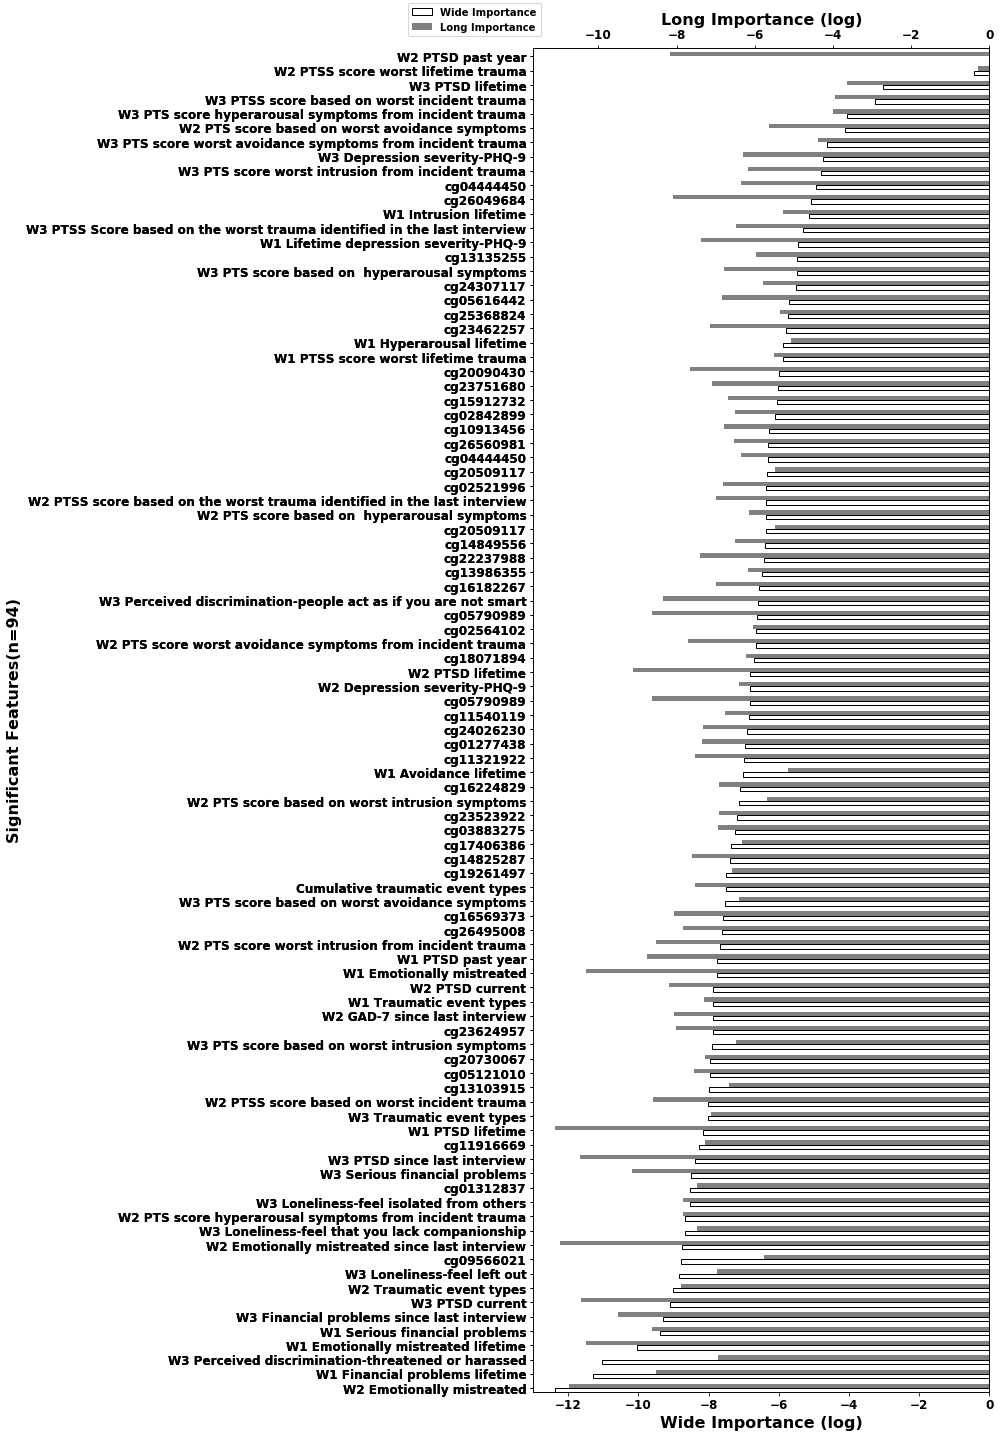

In [32]:
# Lets merge the common features (both cpgs and phenotypes) in cros and long
pheno_comn = pd.merge(common_features.T, fea_df_cros.T, 
                      left_index=True, right_index=True, how='inner')
pheno_comn.columns = ['Wide Importance','Long Importance']
pheno_comn_log = (np.log(pheno_comn.astype(float))).replace(-np.inf, 0)

pheno_comn = pheno_comn.reset_index().rename(columns =
                                       {pheno_comn.index.name:'Pheno'})

pheno_comn_log = pheno_comn_log.sort_values(by=['Wide Importance','Long Importance'], 
                                                  ascending = True)
del pheno_comn_log.index.name # remove the index

BarPlot(pheno_comn_log)

In [81]:
pheno_comn_sorted = pheno_comn.reset_index().rename(columns =
                                       {pheno_comn.index.name:'Pheno'})

pheno_comn_sorted = pheno_comn_sorted.sort_values(by=['Wide Importance','Long Importance'], 
                                                  ascending = False)

In [82]:
pheno_comn_sorted

,index,Pheno,Wide Importance,Long Importance
41,41,W3 PTSD lifetime,0.361757,0.359468
44,44,W3 PTSS score based on worst incident trauma,0.062536,0.029705
6,6,W1 Intrusion lifetime,0.058559,0.044660
24,24,W2 PTSD lifetime,0.038390,0.004374
18,18,W2 PTS score based on worst avoidance symptoms,0.025025,0.017028
...,...,...,...,...
30,30,W3 Financial problems since last interview,0.000092,0.000032
14,14,W2 Emotionally mistreated,0.000055,0.000076
11,11,W1 Serious financial problems,0.000045,0.000587
4,4,W1 Financial problems lifetime,0.000014,0.000174


In [83]:
# write common cpgs to file
pheno_comn_sorted.to_csv("E:/Machine Learning/Output Data/Revised wo W2&3_PTSS Epic Common Important features with importance score.csv", index=False)